# Assignment3
##### Install the tensorflow

In [2]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp39-cp39-win_amd64.whl.metadata (6.8 kB)
  U

## 1 Image Classification
### 1. Download the CIFAR-10 dataset from tensorflow.keras
### 2. Apply appropriate preprocessing steps prior to model training such as:
• Train, validation, test split

• Normalization

• etc.
### 3. Build a Convolutional Neural Network model and train it using the train set from step 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

# Step 1: Download the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 2: Preprocessing
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split train set into train and validation sets
validation_size = int(0.2 * train_images.shape[0])
train_images, val_images = train_images[:-validation_size], train_images[-validation_size:]
train_labels, val_labels = train_labels[:-validation_size], train_labels[-validation_size:]

# Step 3: Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### 4. For each epoch, print the train and validation’s loss and accuracy
### 5. Predict the test set using the model that you have built
### 6. Minimum test accuracy score of the model should be > 0.70

In [3]:
# Step 4: Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

# Print train and validation loss and accuracy for each epoch
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}")
    print(f"Train Loss: {history.history['loss'][i]}")
    print(f"Train Accuracy: {history.history['accuracy'][i]}")
    print(f"Validation Loss: {history.history['val_loss'][i]}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][i]}")

# Step 5: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Ensure test accuracy is greater than 0.70
assert test_acc > 0.70, f"Test accuracy {test_acc} is less than 0.70"


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 149s 1us/step


c:\Users\skrua\miniconda3\envs\py39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3388 - loss: 1.7806 - val_accuracy: 0.5103 - val_loss: 1.4045
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5544 - loss: 1.2523 - val_accuracy: 0.5646 - val_loss: 1.2405
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6154 - loss: 1.0935 - val_accuracy: 0.6178 - val_loss: 1.0789
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6582 - loss: 0.9765 - val_accuracy: 0.6542 - val_loss: 0.9834
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6817 - loss: 0.9054 - val_accuracy: 0.6484 - val_loss: 1.0073
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7139 - loss: 0.8213 - val_accuracy: 0.6668 - val_loss: 0.9474
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7249 - loss: 0.7810 - val_accuracy: 0.6896 - val_loss: 0.8939
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7496 - loss: 0.7252 -

## 2 Autoencoder
### 1. Use the CIFAR-10 dataset from tensorflow.keras
### 2. Apply appropriate processing steps prior to model training:
• Train, validation, test split

• Normalization

• etc.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download the CIFAR-10 dataset
(train_images, _), (test_images, _) = datasets.cifar10.load_data()

# Step 2: Preprocessing
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split train set into train and validation sets
validation_size = int(0.2 * train_images.shape[0])
train_images, val_images = train_images[:-validation_size], train_images[-validation_size:]

### 3. Build an autoencoder model and train it using the train set from step 2
### 4. For each epoch, print the loss
### 5. Visualize the original images and the images outputted by the autoencoder using the first 10 images in the test set.


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.5785 - val_loss: 0.5593
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.5580 - val_loss: 0.5573
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.5564 - val_loss: 0.5557
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.5552 - val_loss: 0.5550
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.5537 - val_loss: 0.5546
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.5532 - val_loss: 0.5537
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.5524 - val_loss: 0.5536
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.5526 - val_loss: 0.5531
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.5512 - val_loss: 0.5529
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.5518 - val_loss: 0.5526
Epoch 1
Loss: 0.5657262802124023
Validation Loss: 0.5592761635780334
Epoch 2
Loss: 0.55716007947921

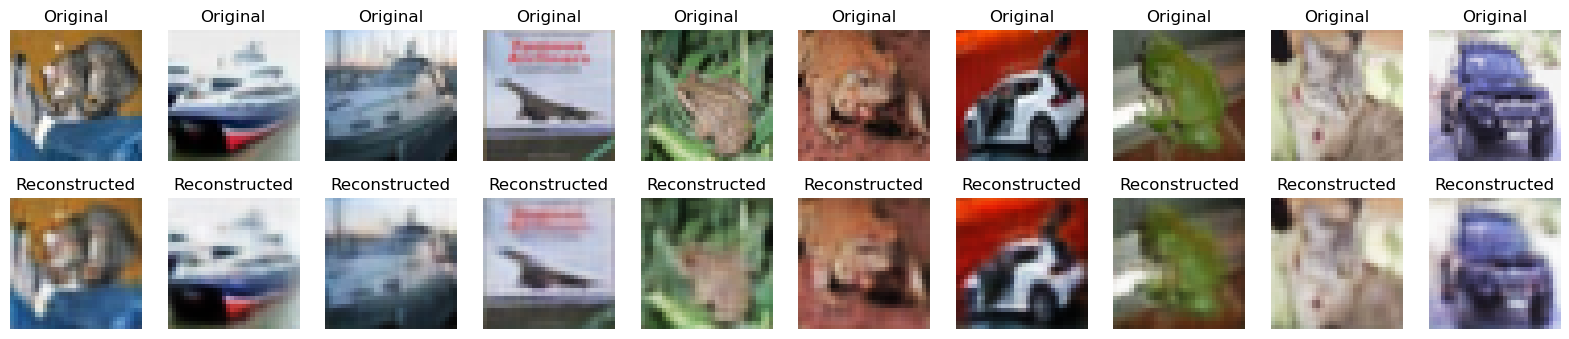

In [4]:
# Step 3: Build the autoencoder model
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)

# Step 4: Compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(train_images, train_images, epochs=10, 
                          validation_data=(val_images, val_images))

# Print loss for each epoch
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}")
    print(f"Loss: {history.history['loss'][i]}")
    print(f"Validation Loss: {history.history['val_loss'][i]}")

# Step 5: Visualize the original and reconstructed images using the first 10 images in the test set
decoded_imgs = autoencoder.predict(test_images[:10])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

## 3 RNN
### 1. Download the Apple stock price dataset from https://www.kaggle.com/datasets/soheiltehranipour/
apple-stock-20132018/code
• Note: ’AAPL.xls’ is the train set and ’AAPL - Jan2018.xls’ is the test set
### 2. Apply appropriate preprocessing steps prior to model training
### 3. Build a Recursive Neural Network Model and train it using the train set

In [3]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Load the datasets
train_df = pd.read_csv('AAPL.xls')
test_df = pd.read_csv('AAPL - Jan2018.xls')

# Assuming the correct column is 'Open', adjust if needed based on the inspection
price_column = 'Open'  # Adjust this if the column name is different

# Step 2: Preprocessing
# Convert the 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Set the 'Date' column as the index
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

# Check for missing values in 'Open' column
print(f"Missing values in train '{price_column}' column: {train_df[price_column].isnull().sum()}")
print(f"Missing values in test '{price_column}' column: {test_df[price_column].isnull().sum()}")

# Select the 'Open' prices and normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_df[price_column].values.reshape(-1, 1))
test_data = scaler.transform(test_df[price_column].values.reshape(-1, 1))

# Print lengths of the datasets
print("Length of train data:", len(train_data))
print("Length of test data:", len(test_data))

# Set sequence length
seq_length = 10

# Create sequences and labels
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Print shapes of the created sequences
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Ensure X_test and y_test are not empty
assert X_test.size > 0, "X_test is empty"
assert y_test.size > 0, "y_test is empty"

# Step 3: Build the RNN model
model = models.Sequential([
    layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    layers.SimpleRNN(50, activation='relu'),
    layers.Dense(1)
])

Missing values in train 'Open' column: 0
Missing values in test 'Open' column: 0
Length of train data: 1259
Length of test data: 20
X_train shape: (1249, 10, 1)
y_train shape: (1249, 1)
X_test shape: (10, 10, 1)
y_test shape: (10, 1)


c:\Users\skrua\miniconda3\envs\py39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. For each epoch, print the model loss
### 5. Predict the stock prices of the test set
### 6. Plot the predicted stock price values against the actual stock price values

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0462 - val_loss: 5.3137e-04
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1471e-04 - val_loss: 4.1861e-04
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9869e-04 - val_loss: 3.4347e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9811e-04 - val_loss: 3.2432e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0201e-04 - val_loss: 4.5187e-04
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5422e-04 - val_loss: 3.2133e-04
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7211e-04 - val_loss: 3.3150e-04
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3570e-04 - val_loss: 3.4872e-04
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5597e-04 - val_loss: 3.2767e-04
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7958e-04 - val_loss: 2.7558e-04
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1987e-04 - val_loss: 3

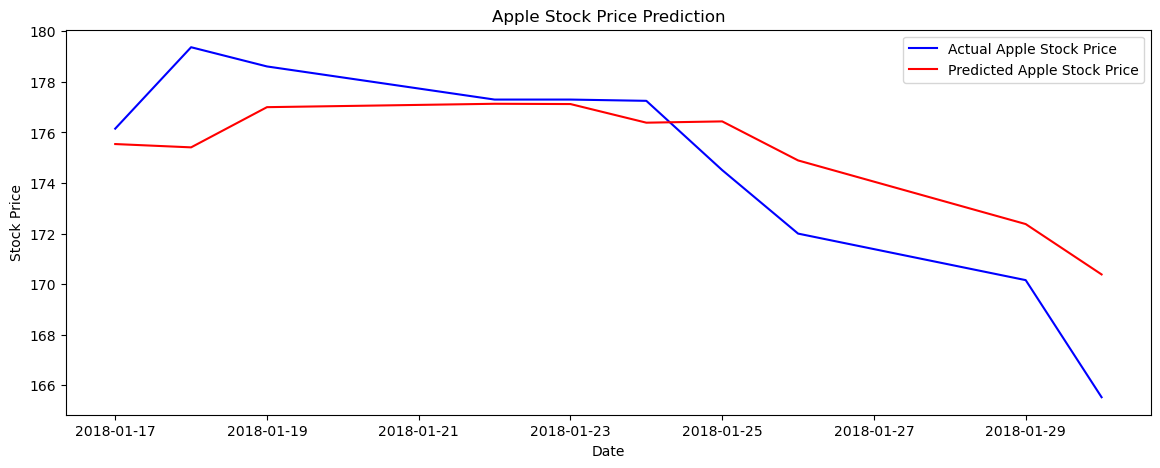

In [38]:
# Step 4: Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Print the model loss for each epoch
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}")
    print(f"Loss: {history.history['loss'][i]}")
    print(f"Validation Loss: {history.history['val_loss'][i]}")

# Step 5: Predict the stock prices of the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform to get the actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print a few values of the predicted and actual stock prices
print("First 5 predicted stock prices:", predicted_stock_price[:5].flatten())
print("First 5 actual stock prices:", actual_stock_price[:5].flatten())

# Step 6: Plot the predicted stock price values against the actual stock price values
plt.figure(figsize=(14, 5))
plt.plot(test_df.index[seq_length:], actual_stock_price, color='blue', label='Actual Apple Stock Price')
plt.plot(test_df.index[seq_length:], predicted_stock_price, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()